In [1]:
pip install umap

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
#import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from datetime import datetime
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS # for MDS dimensionality reduction
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

In [3]:
#used to erase variable from colabnotebook
#%reset_selective -f data

In [14]:
#upload normalised dataset
norm_df=pd.read_csv('/content/norm_data (2).csv',sep = '\,', header = 0, engine = 'python')

In [15]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 149 entries, Unnamed: 0 to sctask2
dtypes: float64(137), int64(12)
memory usage: 49.0 KB


In [16]:
norm_df.drop(['Unnamed: 0'],axis=1,inplace=True )

In [17]:
norm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 148 entries, ageGroup to sctask2
dtypes: float64(137), int64(11)
memory usage: 48.7 KB


In [7]:
#norm_data.info(verbose='max_cols', memory_usage=None, max_cols=None)

In [18]:
#Find the highly correlated features.
#need to confirm weather these highly correlated features drop from data set
correlated_features = set() #use set data structure for avoid duplicates
correlation_matrix = norm_df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'Maximum_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_6mwt_split3_v2', 'panas_neg_t4', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Deviation_of_accelerometer_6mwt_split2_v2', 'amount_of_confidence_two_in_sct', 'Minimum_of_accelerometer_6mwt_split4_v2', 'Minimum_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split4_v3', 'Deviation_of_accelerometer_6mwt_split4_v2', 'Minimum_of_accelerometer_6mwt_split3_v1', 'Minimum_of_accelerometer_sct_split2_v3', 'Deviation_of_smartphone_sct', 'Deviation_of_accelerometer_6mwt_split2_v1', 'Maximum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_smartphone_6mwt', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Minimum_of_fitbit_6mwt.1', 'hee_t4', 'Maximum_of_accelerometer_6mwt_split4_v1', 'Deviation_of

In [19]:
#drop highly correlated data
norm_df.drop(['panas_neg_t4', 'Minimum_of_accelerometer_6mwt_split3_v1', 'Deviation_of_accelerometer_6mwt_split2_v3', 
               'amount_of_confidence_two_in_sct', 'Minimum_of_fitbit_6mwt.1', 'Minimum_of_accelerometer_6mwt_split4_v2', 
               'Deviation_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_sct_split2_v3', 
               'Minimum_of_accelerometer_6mwt_split2_v3', 'Maximum_of_accelerometer_6mwt_split2_v2', 
               'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_smartphone_sct', 'Deviation_of_smartphone_6mwt', 
               'Deviation_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split1_v3', 
               'Minimum_of_accelerometer_6mwt_split4_v3', 'Maximum_of_accelerometer_6mwt_split4_v3', 'Minimum_of_accelerometer_6mwt_split3_v2', 
               'Deviation_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split4_v2', 'hee_t4', 
               'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split4_v1', 
               'Deviation_of_accelerometer_6mwt_split2_v2', 'Maximum_of_accelerometer_6mwt_split3_v2', 
               'Deviation_of_accelerometer_6mwt_split4_v1', 
               'Deviation_of_accelerometer_6mwt_split3_v2'],axis=1,inplace=True)


In [12]:
pip uninstall umap

Found existing installation: umap 0.1.1
Uninstalling umap-0.1.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/umap-0.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/umap/*
Proceed (y/n)? y
  Successfully uninstalled umap-0.1.1


In [13]:
pip install umap-learn

     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=a962be6cfb2042b86c1a0ce804a8b7ca615354b8b0ff27f0df8692000bb58b2d
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=2dd20406a9b61f8a9e3ee7587687fab3393af795225878317e26ffc050cbaa25
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [1]:
import umap.umap_ as umap

**Dimensionality reduction : UMAP**

In [21]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(norm_df)
df_umap=pd.DataFrame(data = embedding, columns =['umap1','umap2'])
df_umap.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



,umap1,umap2
0,7.117688,-4.865844
1,5.326283,-5.501043
2,5.628842,-3.875603
3,5.814781,-6.315827
4,6.206912,-5.455080


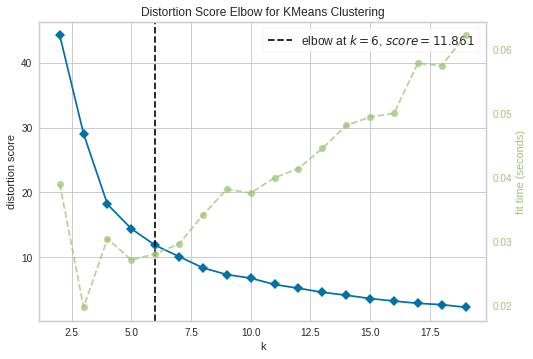

In [23]:
#find the optimal number of clustering after dimensionality reduction using MDS:
kmeans_model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(kmeans_model, k=(2,20), timings= True)
visualizer.fit(df_umap)        # Fit data to visualizer
visualizer.show() 

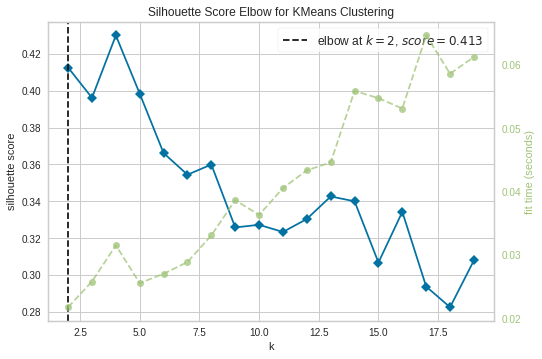

In [24]:
# Silhouette Score for K means
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
mod1 = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(mod1, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(df_umap)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

4

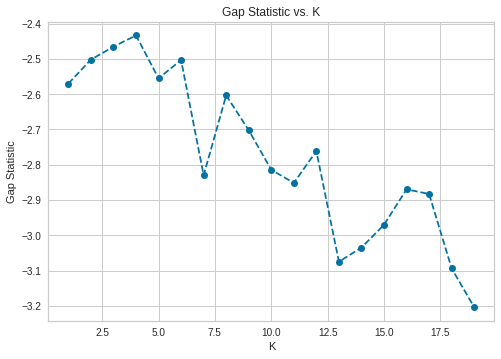

In [25]:
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(df_umap, nrefs=3, maxClusters=20)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

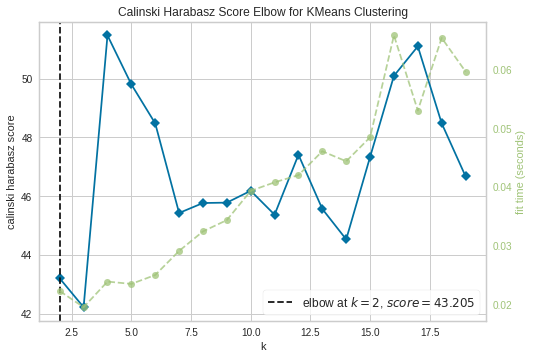

In [26]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
#from yellowbrick.cluster import KElbowVisualizer
mod2 = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(mod2, k=(2,20),metric='calinski_harabasz', timings= True)
visualizer.fit(df_umap)        # Fit the data to the visualizer
visualizer.show()

In [ ]:
#elbow method: k =6
#Silhouette k=2
#gap statistic K=4
#Calinski Harabasz k =2

#so, optimal number of clusters in kmeans =2

In [28]:
#Apply Kmeans clustering algorithm
kmeans = KMeans(2)
#Apply kMeans on data
kmeans.fit(df_umap)
labels = kmeans.labels_ #label/ cluster associating to each data points
#this is centroid of all clusters
kmeans.cluster_centers_.shape
#create a data frame having kmeans centroid and col of df1
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_umap.columns])
#cluster_centers
y_kmeans = kmeans.fit_predict(df_umap)
#y_kmeans

In [29]:
# concatenate the clusters labels to our original dataframe(norm_df)
df_cluster = pd.concat([norm_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,ageGroup,gender,smoker,employed,sports,timeOfDay,testSuit,firstTask,arrival_car/motorcycle,arrival_on foot,arrival_public transport,bmi,dist_6mwt,dist_sct,swe_b_t1,swe_b_t4,swe_m_t1,swe_m_t4,swe_f_t1,swe_f_t4,swe_a_t1,swe_a_t4,hee_t1,facts_t1,facts_t4,bsa_F,bsa_S,abi_p_vig,abi_p_kov,wkv_a_t1,wkv_a_t2,wkv_a_t3,wkv_a_t4,wkv_b_t1,wkv_b_t2,wkv_b_t3,wkv_b_t4,wkv_g_t1,wkv_g_t2,wkv_g_t3,...,amount_of_confidence_one_in_sct,amount_of_confidence_three_in_sct,Maximum_of_accelerometer_6mwt_split1_v1,Minimum_of_accelerometer_6mwt_split1_v1,Deviation_of_accelerometer_6mwt_split1_v1,Maximum_of_accelerometer_6mwt_split2_v1,Minimum_of_accelerometer_6mwt_split2_v1,Maximum_of_accelerometer_6mwt_split3_v1,Minimum_of_accelerometer_6mwt_split4_v1,Maximum_of_accelerometer_6mwt_split1_v2,Minimum_of_accelerometer_6mwt_split1_v2,Deviation_of_accelerometer_6mwt_split1_v2,Minimum_of_accelerometer_6mwt_split2_v2,Maximum_of_accelerometer_6mwt_split4_v2,Maximum_of_accelerometer_6mwt_split1_v3,Minimum_of_accelerometer_6mwt_split1_v3,Maximum_of_accelerometer_6mwt_split2_v3,Maximum_of_accelerometer_6mwt_split3_v3,Maximum_of_accelerometer_sct_split1_v1,Minimum_of_accelerometer_sct_split1_v1,Deviation_of_accerometer_sct_split1_V1,Maximum_of_accelerometer_sct_split2_v1,Minimum_of_accelerometer_sct_split2_v1,Deviation_of_accerometer_sct_split2_V1,Maximum_of_accelerometer_sct_split1_v2,Minimum_of_accelerometer_sct_split1_v2,Deviation_of_accerometer_sct_split1_V2,Maximum_of_accelerometer_sct_split2_v2,Minimum_of_accelerometer_sct_split2_v2,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3,6mwtask1,6mwtask2,sctask1,sctask2,cluster
0,1,0,0,1,1,1,0,1,0,0,1,0.711864,0.083156,0.329114,0.632653,0.843137,0.642857,0.692308,0.578947,0.428571,1.0,1.0,0.882353,0.120301,0.093023,0.247202,0.149632,0.499187,0.640244,1.00,1.00,1.000000,1.000000,1.000000,0.894737,0.727273,0.80,1.0000,1.000000,0.923077,...,0.814815,0.0,0.282158,0.834426,0.303219,0.292077,0.875458,0.330590,0.973480,0.293893,0.794492,0.348033,0.822938,0.284615,0.089716,0.771475,0.049630,0.071970,0.296619,0.806524,0.219814,0.294521,0.917892,0.200622,0.201970,0.864865,0.258731,0.164935,0.853360,0.400822,0.214886,0.913079,0.138895,0.144737,0.125912,0.947368,0.928571,0.818182,0.684211,0
1,0,1,0,1,0,0,1,0,0,1,0,0.627119,0.464819,0.544304,0.020408,0.607843,0.285714,0.846154,0.526316,0.000000,1.0,1.0,0.176471,1.000000,0.434109,0.247202,0.149632,0.400000,0.875000,0.50,0.90,1.000000,0.952381,0.217391,0.631579,0.409091,0.60,0.5000,0.846154,0.846154,...,0.705882,0.0,0.301126,0.755738,0.540913,0.276023,0.822955,0.379287,0.915265,0.413486,0.762712,0.630884,0.752515,0.498901,0.108315,0.736359,0.080741,0.142677,0.341876,0.761530,0.408726,0.407798,0.724265,0.440096,0.223645,0.833333,0.322165,0.457143,0.818737,0.565755,0.109244,0.778229,0.254278,0.137218,0.335416,0.526316,1.000000,0.772727,1.000000,1
2,0,0,0,1,1,0,1,1,1,0,0,0.338983,0.654584,0.506329,0.836735,0.921569,0.928571,0.846154,1.000000,1.000000,1.0,1.0,0.529412,0.097744,0.038760,0.030943,0.128527,0.666667,0.562500,0.45,0.80,0.434783,0.380952,0.478261,0.578947,0.454545,0.50,0.8750,0.769231,0.769231,...,0.603774,0.0,0.426200,0.624590,0.721621,0.433454,0.638584,0.532236,0.826003,0.480916,0.442797,0.690789,0.645875,0.570330,0.239606,0.632091,0.126667,0.236111,0.382225,0.915636,0.290925,0.241834,0.832108,0.287930,0.262069,0.782282,0.301596,0.427273,0.617108,0.533305,0.170468,0.809098,0.212939,0.084586,0.364674,0.947368,1.000000,0.818182,1.000000,1
3,1,1,0,1,1,0,1,0,0,0,0,0.338983,0.581130,0.873418,0.959184,0.823529,1.000000,0.769231,1.000000,0.785714,1.0,0.8,1.000000,0.338346,0.317829,1.000000,0.536050,0.066667,0.625000,0.30,0.55,0.478261,0.095238,0.173913,0.631579,0.590909,0.55,0.0625,0.153846,0.076923,...,0.513514,0.0,0.407825,0.722951,0.544163,0.401864,0.847375,0.486283,0.937904,0.395674,0.449153

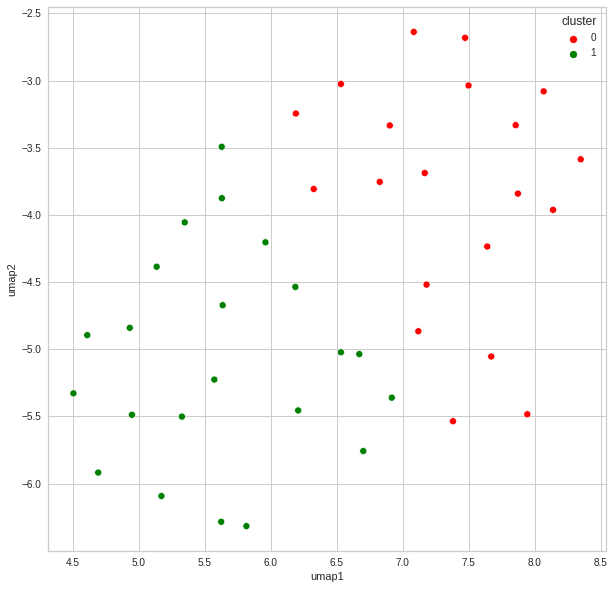

In [46]:
# Concatenate the clusters labels to the dataframe(pca_df)
df_umap_kmeans=pd.concat([df_umap,pd.DataFrame({'cluster':labels})], axis = 1)
#visualize the clusters using principal components
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="umap1", y="umap2", hue = "cluster", data = df_umap_kmeans, palette =['red','green'])
plt.show()

**Apply HAC Algorithm**

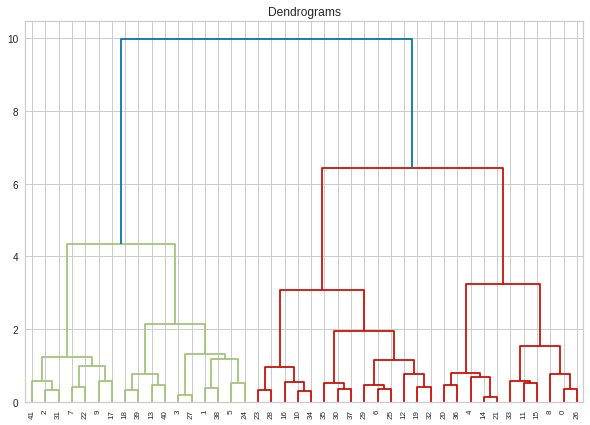

In [33]:
#implement heirarchical clustering.
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_umap, method='ward'))

In [34]:
#based on colour , we can decide optimal number of cluster. Or draw a horizontal line over blue line find count of intercet points
optimal_num_clusters=len(set(dend['color_list']))-1
print(optimal_num_clusters)

2


In [35]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_hc=cluster.fit_predict(df_umap)
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

In [52]:
# Concatenate the clusters labels to the dataframe(pca_df)
df_umap_cpy=df_umap.copy()
df_umap_hac = pd.concat([df_umap_cpy,pd.DataFrame({'cluster_hac':y_hc})], axis = 1)

In [53]:
df_umap_hac.head()

,umap1,umap2,cluster_hac
0,7.117688,-4.865844,0
1,5.326283,-5.501043,1
2,5.628842,-3.875603,1
3,5.814781,-6.315827,1
4,6.206912,-5.455080,0


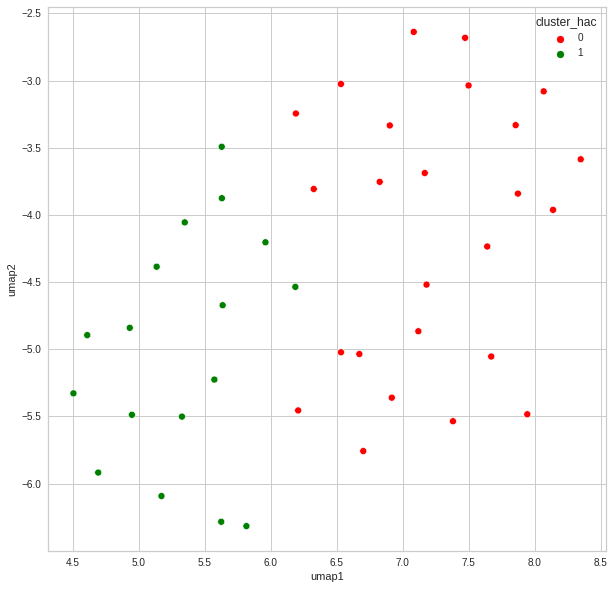

In [55]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="umap1", y="umap2", hue = "cluster_hac", data = df_umap_hac, palette =['red','green'])
plt.show()

**Apply DBSCAN Algorithm**

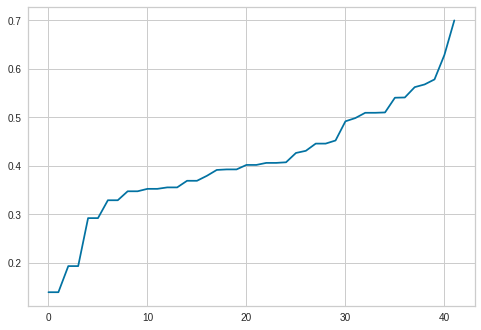

In [87]:
#DBSCAN, let's find appropriate epsilon:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)  #,metric='cosine'
nbrs = neigh.fit(df_umap_cpy)
distances, indices = nbrs.kneighbors(df_umap_cpy)
#print(distances)
distances = np.sort(distances, axis=0)
#print('.........................')
#print(distances)
distances = distances[:,1]
plt.plot(distances)

In [90]:
#print(distances)

Text(0.5, 1.0, 'DBSCAN on UMAP')

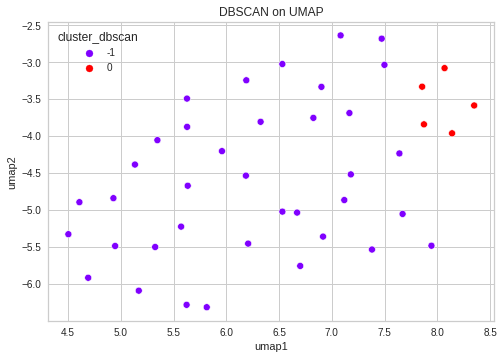

In [91]:
db = DBSCAN(eps=0.58, min_samples=5).fit(df_umap_cpy)
y_dbscan=db.labels_
df_umap_dbscan = pd.concat([df_umap_cpy,pd.DataFrame({'cluster_dbscan':y_dbscan})], axis = 1)
a = sns.scatterplot(x='umap1', y='umap2', hue = 'cluster_dbscan', data = df_umap_dbscan, palette = 'rainbow')
a.set_title('DBSCAN on UMAP')

In [74]:
#not getting clustering while using DBSCAN algorithm when eps =0.2

**Apply Gaussian misture clustering**

In [78]:
#Gaussian misture, let's choose the proper number of clusters:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(df_umap_cpy)
    df_umap_cpy['Cluster'] = gmm.predict(df_umap_cpy)
    d = metrics.silhouette_score(df_umap_cpy, df_umap_cpy['Cluster'], metric='euclidean')
    print(i, d)

2 0.4376128644541726
3 0.495402456808809
4 0.6060994111642233
5 0.5667540451410388
6 0.6275987170617771
7 0.5748014088955187
8 0.5995286854939608
9 0.626170550347885
10 0.6759805763493871


In [86]:
#df_umap_cpy.head()

Text(0.5, 1.0, 'Gaussian mixture on UMAP')

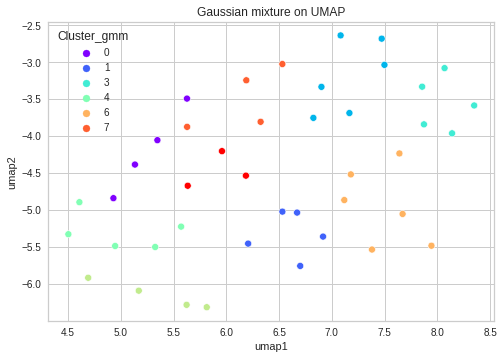

In [85]:
#df_umap_cpy.drop(['Cluster'], axis = 1,inplace=True)
gmm = GaussianMixture(n_components=9)
gmm.fit(df_umap_cpy)
df_umap_cpy['Cluster_gmm'] = gmm.predict(df_umap_cpy)
ax = sns.scatterplot(x='umap1', y='umap2', hue = 'Cluster_gmm', data = df_umap_cpy, palette = 'rainbow')
ax.set_title('Gaussian mixture on UMAP')